<a href="https://colab.research.google.com/github/babyraggge/ml-algorithms/blob/main/02_kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

- Реализовать kmeans
- Визуализировать сходимость центров кластеров
- Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

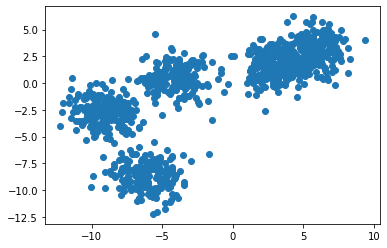

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from abc import ABC, abstractmethod
from collections import Counter
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1]);

In [ ]:
class BaseEstimator(ABC):
  @abstractmethod
  def fit(self):
    pass

  @abstractmethod
  def predict(self):
    pass

In [ ]:
class KMeans(BaseEstimator):

  def __init__(self, n_clusters=2, eps=.001, max_iter=300, seed=42):
    self.n_clusters = n_clusters
    self.eps = eps
    self.max_iter = max_iter
    self.seed = seed

  def _euclidean_distance(self, obj, data):
    return np.sqrt(np.sum((obj - data) ** 2, axis=1))

  def _init_centroids(self, data, k, seed):
    np.random.seed(self.seed)
    init_indices = np.random.choice(data.shape[0], size=k)
    return init_indices

  def fit(data):
    self.data = data
    centroids_inds = _init_centroids(self, self.data, self.k, self.seed)
    centroids = self.data[centroids_inds, :]

    # for i in range(self.max_iter):
    #   # Условие на выход при схождении ...
    #   while(centroids - old_centroids)
        # for obj in data:
        #   distances = self._euclidean_distance(obj, centroids_inds)



  def predict():
    pass



# Задание 2

Исследуйте данные с помощью pandas. Посмотрите на признаки и их распределения. (Например, постройте график распределения автомобилей по годам, типу топлива и т.д.)
1. Кластеризуйте данные с помощью KMeans из sklearn.clustering. 
2. Кластеризуйте данные с помощью KMeans из sklearn.clustering. Найдите оптимальное число кластеров
3. Произведите анализ получившихся кластеров:




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_url = 'https://raw.githubusercontent.com/julia-komleva/ml-course-2021/main/data/2.csv'
df = pd.read_csv(data_url, encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [ ]:
df["Марка"].value_counts()

ВАЗ                5497
Toyota             2700
Nissan             2064
Hyundai            1897
Volkswagen         1885
                   ... 
ВИС                   1
Renault Samsung       1
Hawtai                1
Scion                 1
Tianma                1
Name: Марка, Length: 92, dtype: int64

In [ ]:
for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

Марка: 92
Год: 28
Состояние: 1
Пробег: 3443
Объем: 45
Топливо: 5
Мощность: 303
Кузов: 11
Привод: 3
КПП: 4
Руль: 2
Хозяев в ПТС: 3
Цена: 1577


In [ ]:
df.drop("Состояние", axis=1, inplace=True) # Дисперсия 0, зачем такой признак вообще нужен

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35019 entries, 0 to 61065
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Марка         35019 non-null  object 
 1   Год           35019 non-null  float64
 2   Пробег        35019 non-null  float64
 3   Объем         35019 non-null  float64
 4   Топливо       35019 non-null  object 
 5   Мощность      35019 non-null  float64
 6   Кузов         35019 non-null  object 
 7   Привод        35019 non-null  object 
 8   КПП           35019 non-null  object 
 9   Руль          35019 non-null  object 
 10  Хозяев в ПТС  35019 non-null  object 
 11  Цена          35019 non-null  float64
dtypes: float64(5), object(7)
memory usage: 3.5+ MB


In [ ]:
num_features = [col for col in df.columns if df[col].dtype == "float64"]
cat_features = [col for col in df.columns if df[col].dtype == "object"]

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
def drawSSEPlot(df, n_clusters=8, max_iter=300, tol=1e-04, init='k-means++', n_init=10):
    inertia_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, tol=tol, init=init, n_init=n_init, random_state=1)
        km.fit_predict(df)
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, n_clusters+1), inertia_values, color='red')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('SSE / Inertia', fontsize=15)
    plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)])

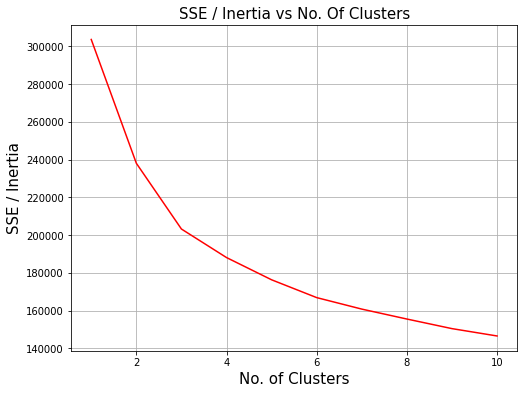

In [ ]:
prep_data = preprocessor.fit_transform(df).toarray()
drawSSEPlot(prep_data, 10)
# 6 сойдет

In [ ]:
# kmean_pipeline = Pipeline(steps=[
#                       ('preprocessor', preprocessor),
#                       ('clusterizer', KMeans(n_clusters=6))]
#                       )

In [ ]:
def get_clusterization_report(df, km):
  clusters = km.fit_predict(prep_data)
  df['cluster'] = clusters

In [ ]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(prep_data)
df['cluster'] = clusters

In [ ]:
df_enc = df.copy(deep=True)
labels = []
for feature in cat_features:
  lenc = LabelEncoder()
  df_enc[feature] = lenc.fit_transform(df[feature])
  labels.append({i : f for i, f in enumerate(lenc.classes_.tolist())})

In [ ]:
labels

[{0: 'Acura',
  1: 'Alfa Romeo',
  2: 'Audi',
  3: 'BMW',
  4: 'BYD',
  5: 'Brilliance',
  6: 'Buick',
  7: 'Cadillac',
  8: 'Changan',
  9: 'Chery',
  10: 'Chevrolet',
  11: 'Chrysler',
  12: 'Citroen',
  13: 'Dacia',
  14: 'Daewoo',
  15: 'Daihatsu',
  16: 'Datsun',
  17: 'Derways',
  18: 'Dodge',
  19: 'DongFeng',
  20: 'Doninvest',
  21: 'FAW',
  22: 'Fiat',
  23: 'Ford',
  24: 'Foton',
  25: 'GMC',
  26: 'Geely',
  27: 'Great Wall',
  28: 'Hafei',
  29: 'Haima',
  30: 'Haval',
  31: 'Hawtai',
  32: 'Honda',
  33: 'Hummer',
  34: 'Hyundai',
  35: 'IKCO',
  36: 'Infiniti',
  37: 'Iran Khodro',
  38: 'Isuzu',
  39: 'JAC',
  40: 'Jaguar',
  41: 'Jeep',
  42: 'Kia',
  43: 'Lancia',
  44: 'Land Rover',
  45: 'Lexus',
  46: 'Lifan',
  47: 'Lincoln',
  48: 'Luxgen',
  49: 'Mazda',
  50: 'Mercedes-Benz',
  51: 'Mercury',
  52: 'Mini',
  53: 'Mitsubishi',
  54: 'Nissan',
  55: 'Oldsmobile',
  56: 'Opel',
  57: 'Peugeot',
  58: 'Pontiac',
  59: 'Porsche',
  60: 'Ravon',
  61: 'Renault',
  62

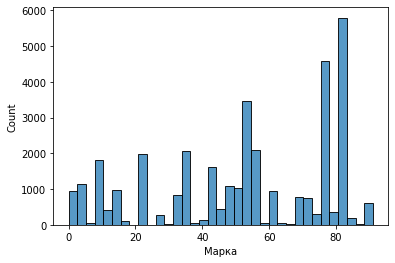

In [ ]:
sns.histplot(df_enc['Марка']);

In [ ]:
res = df_enc.groupby(by="cluster").median()
res

,Марка,Год,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
cluster,,,,,,,,,,,,
0,61,2006.0,127000.0,1600.0,0,89.0,8,1,2,0,2,185000.0
1,47,2010.0,106000.0,3000.0,0,225.0,2,2,0,0,1,1059196.0
2,54,2012.0,70000.0,1600.0,0,123.0,8,1,2,0,0,535000.0
3,54,2001.0,212000.0,2000.0,0,137.0,8,1,0,0,2,250000.0


In [ ]:
for feature, dictinary in zip(cat_features, labels):
  res[feature] = res[feature].map(dictinary)

In [ ]:
res

,Марка,Год,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
cluster,,,,,,,,,,,,
0,Renault,2006.0,127000.0,1600.0,бензин,89.0,седан,передний,механика,левый,3 и более,185000.0
1,Lincoln,2010.0,106000.0,3000.0,бензин,225.0,кроссовер,полный,автомат,левый,2 владельца,1059196.0
2,Nissan,2012.0,70000.0,1600.0,бензин,123.0,седан,передний,механика,левый,1 владелец,535000.0
3,Nissan,2001.0,212000.0,2000.0,бензин,137.0,седан,передний,автомат,левый,3 и более,250000.0
